# Start Here: SciServer Compute in 5 minutes

Welcome to SciServer Compute, your free online resource for working with large scientific datasets. With this notebook, you will use Compute to do real science in less than five minutes. This starting notebook works through an astronomy example, but no prior knowledge of astronomy is required.

You can use this example notebook (or any others) as a starting point for your own notebooks. Please create a copy before modifying to ensure your work will not be overwritten by future updates.

At present, all example notebooks are written in Python 3. Please make sure that "Python 3" appears in the top right corner of this page; if not, please change to Python 3 using the Kernel menu. If you are already familiar with Python syntax, you can skip the "Hello world" example below and go straight to the "Using SciServer Modules" section.

Notebooks consist of Markdown cells (with a white background, like this one) and Code cells (with a gray background). Markdown cells contain explanatory text; Code cells contain executable code. To run the code, click inside a Code cell and click the Play button above (or use the keyboard shortcut Shift-Enter). Try a famous example by running the Code cell below.

## Hello world

In [3]:
print('hello world')

hello world


Congratulations, you just wrote your first Python command! Try changing the message inside the parentheses and see how the output changes. Teaching Python commands is beyond the scope of this tutorial, but Python has <a href="https://docs.python.org/3/tutorial/" target="_blank">an excellent tutorial</a> where you can learn the basics.

## Using SciServer modules

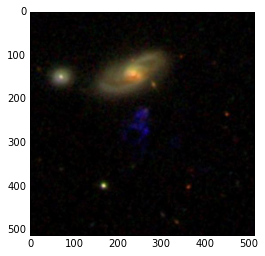

In [14]:
import SciServer.CasJobs as CasJobs
import SciServer.SkyServer as SkyServer
import matplotlib.pyplot as plt
from pprint import pprint

# Get SDSS image - simple example for Hanny's Voorwerp with only required parameters.

ra_center = 145.2658   # RA of image center as decimal degrees
dec_center = 34.7265   # Dec of image center as decimal degrees
pixel_scale = 0.2

img = SkyServer.getJpegImgCutout(ra = ra_center, dec = dec_center, scale = pixel_scale)  # create image using SkyServer.getJpegImgCutout

plt.imshow(img)    # show image using pyplot.imshow

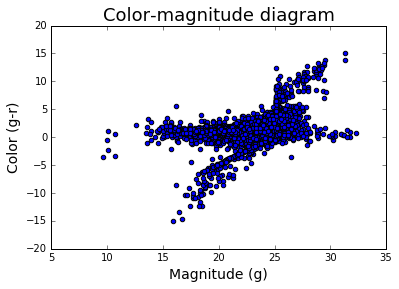

In [37]:
import SciServer.CasJobs as CasJobs
import SciServer.SkyServer as SkyServer
import matplotlib.pyplot as plt
query = 'select top 10000 g, r, g-r as color_gr from galaxy'
result = CasJobs.executeQuery(query,'dr13')
plt.scatter(result['g'], result['color_gr'])

plt.title('Color-magnitude diagram',fontsize=18)
plt.xlabel('Magnitude (g)',fontsize=14)
plt.ylabel('Color (g-r)',fontsize=14)

plt.show()

## Science in two tweets!

In [2]:
import SciServer.CasJobs as c, matplotlib.pyplot as p
print('ok')

ok


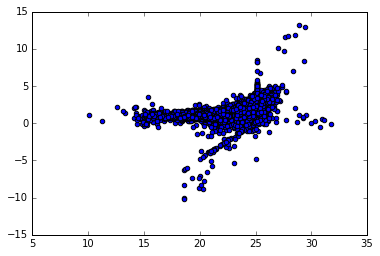

In [3]:
r = c.executeQuery('select top 10000 g,r,g-r as x from photoobj','dr13')
p.scatter(r['g'],r['x'])

## Cleaner version of same analysis

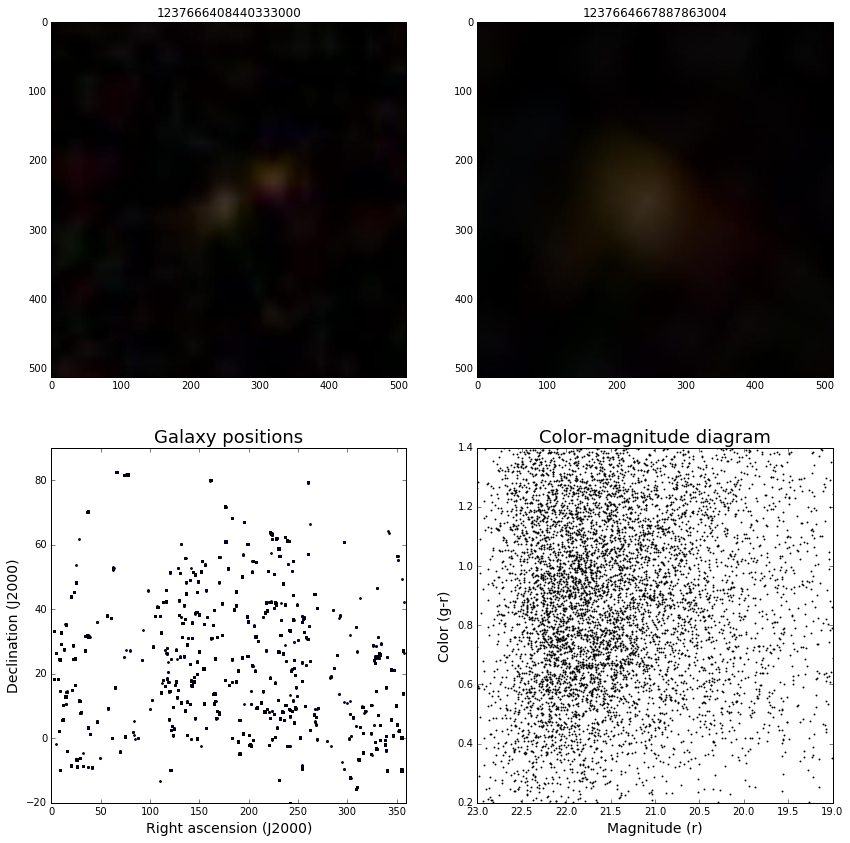

In [4]:
import SciServer.CasJobs as CasJobs
import SciServer.SkyServer as SkyServer
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
query = 'select top 10000 objid, ra, dec, petror90_r, g, r, g-r as color_gr '
query += 'from photoobj '
query += 'where clean=1 and type=3'
galaxies_df = CasJobs.executeQuery(query,'dr13')
galaxies_df = galaxies_df.set_index('objid')

sdsspixelscale=0.396
sample_galaxies_df = galaxies_df.sample(2)
plt.figure(figsize=(14,14))

subPlotNum = 1
nGalaxies = len(galaxies_df)
display(HTML('<h2>Galaxy analysis</h2>'))
display(HTML('<h3>Two sample images from {:,.0f} total</h3>'.format(nGalaxies)))
#display(HTML('<p>Estoy pensando...</p>'))
for index,this_sample_galaxy in sample_galaxies_df.iterrows():
    this_ra = this_sample_galaxy['ra']
    this_dec = this_sample_galaxy['dec']
    this_petror90_r = this_sample_galaxy['petror90_r']
    this_scale = 2 * sdsspixelscale * (this_petror90_r / 60)
    plt.subplot(2,2,subPlotNum)
    plt.imshow(SkyServer.getJpegImgCutout(this_ra, this_dec,scale=this_scale))# scale=0.7, width=512, height=512, opt='', query='', dataRelease=None))    # show the object identifier (objId) above the image.
    plt.title(index)
    subPlotNum += 1

plt.subplot(2,2,3)
#plt.subplot(2,2,1)
plt.scatter(galaxies_df['ra'], galaxies_df['dec'],s=3)
plt.axis([0, 360, -20, 90])
plt.title('Galaxy positions',fontsize=18)
plt.xlabel('Right ascension (J2000)',fontsize=14)
plt.ylabel('Declination (J2000)',fontsize=14)
plt.subplot(2,2,4)
#plt.subplot(2,2,2)
plt.scatter(galaxies_df['r'], galaxies_df['color_gr'],s=0.8)
plt.title('Color-magnitude diagram',fontsize=18)
plt.axis([23,19,0.2,1.4])
plt.xlabel('Magnitude (r)',fontsize=14)
plt.ylabel('Color (g-r)',fontsize=14)

plt.show()




Thank you for downloading our Example Notebooks into your <strong>examples</strong> folder. You can use them as a starting point for your own notebooks. Please copy the notebooks into a new folder before modifying them; otherwise, your changes might be overwritten by future system updates.


with SciServer Compute system in five minutes or less.

You are welcome (encouraged!) to copy these examples into another folder and modify them to meet your needs. You can use them as a starting point to create your own scripts. Please do not edit notebooks directly, because your edits may be overwritten if changes to the SciServer modules require changes to these example notebooks.

To run the example Python scripts in this notebook, click in any of the Code cells below (the ones with the gray backgrounds). Click the play button at the top of the window (just below the menubar) to run the commands in that Code cell, or press Shift-Enter. The output of each cell's script will appear directly below the cell.